In [58]:
import numpy as np
import pandas as pd

municipalities = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/municipalities.csv', header=None)
popsize = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/popsize.csv', delimiter=';', header=None)
proc = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/proc_2013.csv', delimiter=';')
cpv = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/cpv_codes.xlsx', sheet_name='CPV codes')

In [59]:
col1 = ['municipality']

municipalities.columns = (col1)
municipalities.head()

,municipality
0,ABRANTES
1,AGUIAR DA BEIRA
2,ALANDROAL
3,ALBERGARIA-A-VELHA
4,ALBUFEIRA


In [60]:
col2 = ['municipality', 'pop']
popsize = popsize.iloc[:, :-1]
popsize.columns = col2
popsize.head()

,municipality,pop
0,Arcos de Valdevez,22 284
1,Caminha,16 465
2,Melgaço,8 874
3,Monção,18 931
4,Paredes de Coura,9 039


In [61]:
proc.drop(proc.columns[0], axis = 1, inplace=True)
proc.head()

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue
0,3046974,21-02-2017,Aquisição de serviços,PT EMPRESAS / MEO,"EPRALIMA - Escola Profissional do Alto Lima, C...",MEO (504615947),"64000000-6, Serviços postais e de telecomunica...",01-12-2013,"247,00 €",744 dias,"Portugal, Viana do Castelo, Arcos de Valdevez",-,-
1,2332852,09-08-2016,Aquisição de serviços,CP 07/2013 - Aquisição de serviços de saúde no...,"Rádio e Televisão de Portugal, S. A. (500225680)","Atlanticare, Serviços Saúde S.A. (507528212)","85147000-1, Serviços de medicina do trabalho",01-12-2013,"69.744,24 €",365 dias,Portugal,-,-
2,1467402,29-05-2015,Aquisição de serviços,Prestação Serviços Médicos-Especialidade de Ci...,Centro Hospitalar do Oeste (510412009),GS24 (507824652),"85121000-3, Serviços de prática médica",01-12-2013,"12.775,62 €",31 dias,"Portugal, Leiria, Caldas da Rainha",31-12-2013,"12.775,62 €"
3,1407921,17-03-2015,Aquisição de serviços,Aquisição de Serviços de Seguros no Ramo Acide...,"Centro Hospitalar de São João, E. P. E. (50982...",Isaura Manuela Silva Santos (209910496),"66510000-8, Serviços de seguros",01-12-2013,"112.120,04 €",31 dias,"Portugal, Porto, Porto",-,-
4,1177748,01-09-2014,Aquisição de serviços,310/AgdA/2013,"AgdA - Águas Públicas do Alentejo, S. A. (5091...",ALEXANDRE GUERREIRO FIGUEIREDO (219339996),"79100000-5, Serviços jurídicos",01-12-2013,"12.000,00 €",365 dias,"Portugal, Beja",30-11-2014,"12.000,00 €"


In [62]:
cpv.head()

,CODE,EN,PT
0,03000000-1,"Agricultural, farming, fishing, forestry and r...","Produtos da agricultura, da pesca, da silvicul..."
1,03100000-2,Agricultural and horticultural products,Produtos agrícolas e hortofrutícolas
2,03110000-5,"Crops, products of market gardening and hortic...","Cereais, produtos de culturas industriais e da..."
3,03111000-2,Seeds,Sementes
4,03111100-3,Soya beans,Soja


In [63]:
# Remove euro sign
proc['initialValue'] = proc['initialValue'].str.replace('€', '')
proc['finalValue'] = proc['finalValue'].str.replace('€', '')

# Remove dot in the middle of the number
proc['initialValue'] = proc['initialValue'].str.replace('.', '')
proc['finalValue'] = proc['finalValue'].str.replace('.', '')

# Replace the commas by dots to facilitate the conversion of string to float
proc['initialValue'] = proc['initialValue'].str.replace(',', '.')
proc['finalValue'] = proc['finalValue'].str.replace(',', '.')

# Replace slash by nan
proc['finalValue'] = proc['finalValue'].replace('-', np.nan)

# Convert string to float
proc['initialValue'] = proc['initialValue'].astype(float)
proc['finalValue'] = proc['finalValue'].astype(float)

In [64]:
proc.dtypes

ID                    int64
dateBase             object
type                 object
description          object
contracting          object
contractor           object
CPV                  object
initialDate          object
initialValue        float64
proposedDuration     object
local                object
closingDate          object
finalValue          float64
dtype: object

In [65]:
# Split CPV into description and code
proc['CPV_description'] = proc['CPV'].str.split(',').str[1]
proc['CPV_code'] = proc['CPV'].str.split(',').str[0]

# Separate contracting and contracted into name and NIF of each one.
proc['contracting_name'] = proc['contracting'].map(lambda x: str(x)[:-11])
proc['contracting_nif'] = proc['contracting'].map(lambda x: str(x)[-11:])
proc['contractor_name'] = proc['contractor'].map(lambda x: str(x)[:-11])
proc['contractor_nif'] = proc['contractor'].map(lambda x: str(x)[-11:])

In [66]:
proc.contracting_nif

0        (504404830)
1        (500225680)
2        (510412009)
3        (509821197)
4        (509133843)
5        (600032205)
6        (501462244)
7        (600012662)
8        (600012662)
9        (600012662)
10       (600012662)
11       (510837484)
12       (501293450)
13       (501293450)
14       (501617582)
15       (508527864)
16       (501540709)
17       (501540709)
18       (501540709)
19       (501540709)
20       (672002744)
21       (501540709)
22       (600085171)
23       (600019039)
24       (510745997)
25       (600019039)
26       (510856918)
27       (510856918)
28       (510856918)
29       (510856918)
            ...     
82986    (500999015)
82987    (501136541)
82988    (510103448)
82989    (600082490)
82990    (506831957)
82991    (600010686)
82992    (508085888)
82993    (500122237)
82994    (500122237)
82995    (509374824)
82996    (501546073)
82997    (600010180)
82998    (500792771)
82999    (507472420)
83000    (680011439)
83001    (501540709)
83002    (680

In [67]:
municipalProc = proc.loc[proc['contracting_name'].str.contains("^Município d|^Municipio d")]
# Create a column with the municipalities
municipalProc['municipality'] = municipalProc['contracting_name'].map(lambda x: str(x)[13:])
municipalProc['municipality'] = municipalProc['municipality'].str.strip()

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [70]:
# Change the date to pandas date type 
municipalProc['initialDate'] = pd.to_datetime(municipalProc['initialDate'])
municipalProc['initialMonth'] = municipalProc['initialDate'].dt.month
municipalProc['initialMonth']

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


40       2
60       2
80       2
149      2
185      2
186      2
191      2
192      2
199      2
203      2
204      2
223      2
228      2
230      2
231      2
232      2
233      2
236      2
241      2
243      2
244      2
245      2
246      2
248      2
254      2
257      2
260      2
261      2
287      2
288      2
        ..
82913    8
82930    8
82932    8
82933    8
82935    8
82936    8
82939    8
82940    8
82942    8
82948    8
82949    8
82956    8
82958    8
82959    8
82962    8
82964    8
82965    8
82966    8
82967    8
82969    8
82970    8
82972    8
82973    8
82974    8
82976    8
82977    8
82978    8
82980    8
82981    8
82982    8
Name: initialMonth, Length: 20270, dtype: int64

In [89]:
expensesByCity = pd.DataFrame(municipalProc.groupby(['municipality'])['municipality','initialValue'].sum()).reset_index()
monthlyExpenses = pd.DataFrame(municipalProc.groupby(['municipality','initialMonth'])['initialValue'].sum()).reset_index()

monthlyExpenses

,municipality,initialMonth,initialValue
0,Abrantes,1,259511.02
1,Abrantes,2,91229.29
2,Abrantes,3,248446.16
3,Abrantes,4,278760.06
4,Abrantes,5,278743.52
5,Abrantes,6,904203.69
6,Abrantes,7,496567.88
7,Abrantes,8,794627.52
8,Abrantes,9,452083.48
9,Abrantes,10,8750.00


In [102]:
monthlyExpenses = pd.pivot_table(monthlyExpenses,
                                 values="initialValue",
                                 index=['municipality'],
                                 columns=['initialMonth'])
monthlyExpenses

KeyError: 'initialValue'

In [103]:
monthlyExpenses.plot(kind="bar", 
        figsize=(50,50),
        stacked=True)

initialMonth,1,2,3,4,5,6,7,8,9,10,11,12
municipality,,,,,,,,,,,,
Abrantes,259511.02,91229.29,248446.16,278760.06,278743.52,904203.69,496567.88,794627.52,452083.48,8750.00,220644.20,977855.55
Aguiar da Beira,257206.39,99333.74,183464.00,523775.30,431213.42,152342.30,785528.36,852134.16,1024215.34,6808.00,264149.71,135576.29
Alandroal,366671.14,97356.68,25701.92,320417.34,668373.52,754600.55,252943.26,82430.00,50077.00,NaN,7594.90,17277.00
Albergaria-a-Velha,131007.98,407694.09,271639.67,491733.33,463814.15,78674.50,358198.91,745532.70,173096.47,100000.00,764733.10,492015.21
Albufeira,456566.69,2967294.96,1362307.25,64160.34,588578.26,711835.00,77487.04,450759.98,144413.32,837000.00,349969.61,426901.02
Alcanena,39999.95,NaN,NaN,34984.36,14237.30,NaN,66774.22,121551.24,122603.98,157057.39,105566.92,108067.56
Alcobaça,NaN,316234.79,151191.36,3977.00,384000.90,384150.88,396082.61,483291.17,774808.77,34698.68,198845.20,147542.50
Alcochete,13912.83,33381.30,74032.04,123436.16,54091.75,NaN,281242.34,18000.00,15900.00,NaN,98597.84,NaN
Alcoutim,179387.23,225891.47,808656.46,27671.00,311491.38,794880.41,91333.78,896910.87,178389.19,116885.72,5747.35,116880.18


In [120]:
monthlyProc = pd.DataFrame(municipalProc.groupby(['initialMonth'])['ID'].agg(['count'])).reset_index()

In [121]:
monthlyProc

,initialMonth,count
0,1,1381
1,2,1551
2,3,1564
3,4,1649
4,5,2145
5,6,1783
6,7,1836
7,8,1885
8,9,2359
9,10,1063


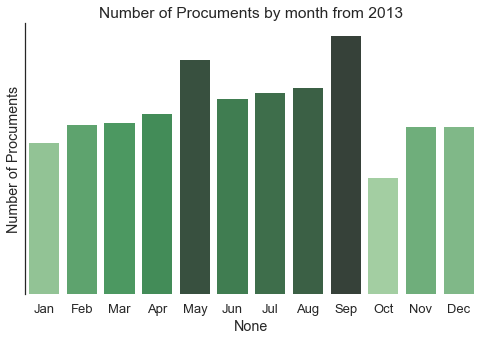

In [157]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax3) = plt.subplots(1, figsize=(7, 5), sharex=True)

# Switch the month number to its respective name
month = monthlyProc['initialMonth'].apply(lambda x: calendar.month_abbr[x])

# Set the strongest colors to the highest number of procurements
pal = sns.color_palette("Greens_d", len(month))
rank = monthlyProc['count'].argsort().argsort()

sns.barplot(x=month ,y=monthlyProc['count'], palette=np.array(pal[::-1])[rank])
#ax3.axhline(0, color="k", clip_on=False)
ax3.set_xlabel(None)
ax3.set_ylabel('Number of Procuments')
ax3.set_title('Number of Procuments by month from 2013')

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)